In [0]:
Cfrom google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline

df = pd.read_csv('/content/drive/My Drive/TwitterSentimentAnalysis/output_files/Love_Island_With_Sentiment.csv')

df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,type,time,author,author_id,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,date,sentiment,polarity,subjectivity
0,0,1156353607714951174,tweet,2019-07-30 23:59:18,WestfieldDryCle,1156351958372032513,1156353607714951174,Our serviceshttps://www.westfielddrycleaners.c...,"['https://t.co/aBwieRdvxF', 'https://t.co/jBXp...","['#drycleaning', '#laundry', '#servicewash', '...",[],0.0,1.0,1.0,2019-07-30,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0
1,1,1156353553616818176,tweet,2019-07-30 23:59:05,loveislandthink,1150188268354527232,1156353553616818176,Favourite Boy?Ovie for the win for me@LoveIsla...,[],"['#LoveIsland', '#LoveIsland', '#Ovie', '#Tomm...",['@LoveIsland'],0.0,0.0,0.0,2019-07-30,"Sentiment(polarity=0.8, subjectivity=0.4)",0.800000,0.4
2,2,1156353026765946881,tweet,2019-07-30 23:57:00,LoveIslandCTV,1121829701964783618,1156353026765946881,Quick! Get to your TV! #LoveIsland is just min...,['https://t.co/Bqrre5sq7T'],"['#LoveIsland', '#LoveIsland', '#LoveIslandUSA']",[],1.0,4.0,2.0,2019-07-30,"Sentiment(polarity=0.5208333333333333, subject...",0.520833,0.5
3,3,1156352788781289472,tweet,2019-07-30 23:56:03,ayoo24,37830710,1156352788781289472,Lmfaooooo Maura is thirsty as fuck #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0.0,0.0,0.0,2019-07-30,"Sentiment(polarity=-0.4, subjectivity=0.6)",-0.400000,0.6
4,4,1156352751162593280,tweet,2019-07-30 23:55:54,kie_vs_theworld,744772362214604800,1156352751162593280,I gotta get on #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0.0,0.0,0.0,2019-07-30,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709727 entries, 0 to 1709726
Data columns (total 18 columns):
Unnamed: 0          object
id                  object
type                object
time                object
author              object
author_id           int64
associated_tweet    int64
text                object
links               object
hashtags            object
mentions            object
reply_count         float64
favorite_count      float64
retweet_count       float64
date                object
sentiment           object
polarity            float64
subjectivity        float64
dtypes: float64(5), int64(2), object(11)
memory usage: 234.8+ MB


In [0]:
#create a new dataframe and remove rows with 0 polarity
df_polarity = df[df.polarity != 0]
df_polarity.head()


,Unnamed: 0,id,type,time,author,author_id,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,date,sentiment,polarity,subjectivity
1,1,1156353553616818176,tweet,2019-07-30 23:59:05,loveislandthink,1150188268354527232,1156353553616818176,Favourite Boy?Ovie for the win for me@LoveIsla...,[],"['#LoveIsland', '#LoveIsland', '#Ovie', '#Tomm...",['@LoveIsland'],0.0,0.0,0.0,2019-07-30,"Sentiment(polarity=0.8, subjectivity=0.4)",0.800000,0.400
2,2,1156353026765946881,tweet,2019-07-30 23:57:00,LoveIslandCTV,1121829701964783618,1156353026765946881,Quick! Get to your TV! #LoveIsland is just min...,['https://t.co/Bqrre5sq7T'],"['#LoveIsland', '#LoveIsland', '#LoveIslandUSA']",[],1.0,4.0,2.0,2019-07-30,"Sentiment(polarity=0.5208333333333333, subject...",0.520833,0.500
3,3,1156352788781289472,tweet,2019-07-30 23:56:03,ayoo24,37830710,1156352788781289472,Lmfaooooo Maura is thirsty as fuck #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0.0,0.0,0.0,2019-07-30,"Sentiment(polarity=-0.4, subjectivity=0.6)",-0.400000,0.600
5,5,1156352721731170304,tweet,2019-07-30 23:55:47,puhpayah,778579951750619136,1156352721731170304,@Metro_Ents @MetroUK just curious would y’all ...,['https://t.co/UfG80DFKKe'],"['#LoveIsland', '#LoveIsland']","['@Metro_Ents', '@MetroUK']",0.0,3.0,0.0,2019-07-30,"Sentiment(polarity=-0.1, subjectivity=1.0)",-0.100000,1.000
7,7,1156352633428422661,tweet,2019-07-30 23:55:26,naomiCrussell,39304486,1156352633428422661,"Youngsters don’t have issues dating, why isn’t...",[],"['#loveisland', '#loveisland', '#BeReal', '#Lo...",[],0.0,6.0,1.0,2019-07-30,"Sentiment(polarity=0.225, subjectivity=0.525)",0.225000,0.525


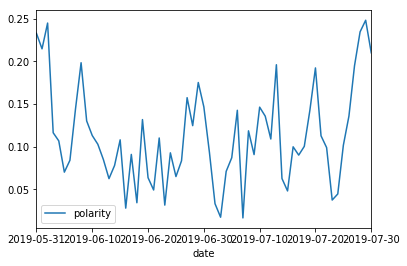

In [0]:
df_polarity.groupby(df_polarity.date)[['polarity']].mean().plot()

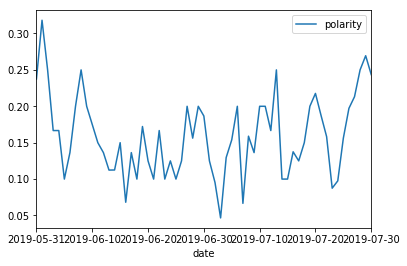

In [0]:
df_polarity.groupby(df_polarity.date)[['polarity']].median().plot()

In [0]:
df_amber = df_polarity[df_polarity['text'].str.contains("amber")]
df_jordan = df_polarity[df_polarity['text'].str.contains("jordan")]
df_tommy = df_polarity[df_polarity['text'].str.contains("tommy")]
df_molly = df_polarity[df_polarity['text'].str.contains("molly")]
df_maura = df_polarity[df_polarity['text'].str.contains("maura")]
df_curtis = df_polarity[df_polarity['text'].str.contains("curtis")]
df_michael = df_polarity[df_polarity['text'].str.contains("michael")]


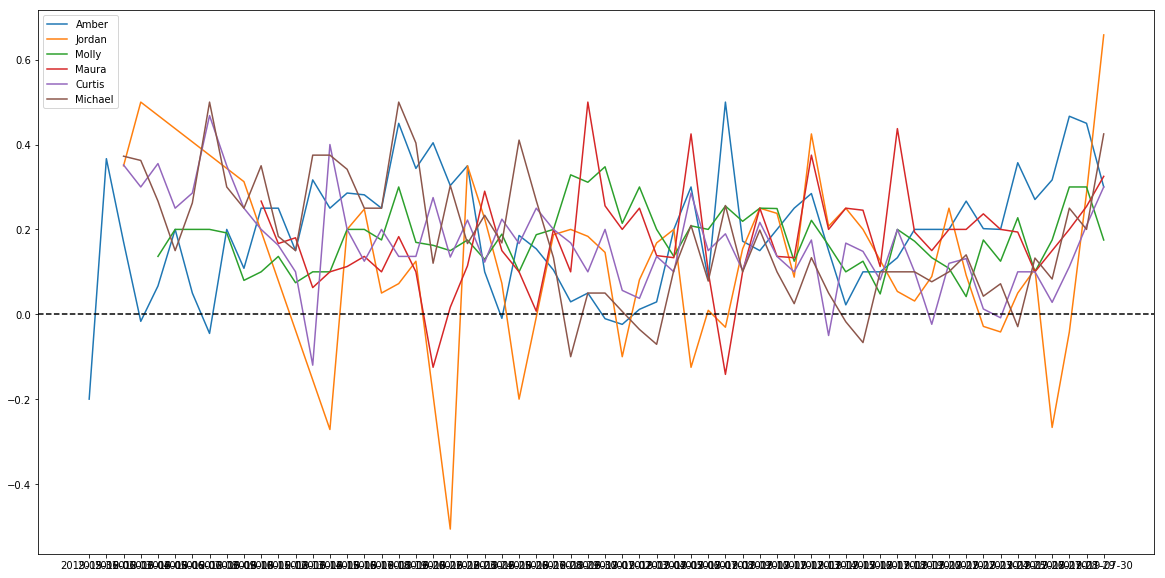

In [0]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)

ax1.plot(df_amber.groupby(df_amber.date)[['polarity']].median(),label='Amber')
ax1.plot(df_jordan.groupby(df_jordan.date)[['polarity']].median(),label='Jordan')
#ax1.plot(df_tommy.groupby(df_tommy.date)[['polarity']].median(),label='Tommy')
ax1.plot(df_molly.groupby(df_molly.date)[['polarity']].median(),label='Molly')
ax1.plot(df_maura.groupby(df_maura.date)[['polarity']].median(),label='Maura')
ax1.plot(df_curtis.groupby(df_curtis.date)[['polarity']].median(),label='Curtis')
ax1.plot(df_michael.groupby(df_michael.date)[['polarity']].median(),label='Michael')
ax1.axhline(0,color='black',ls='--')
leg = ax1.legend()


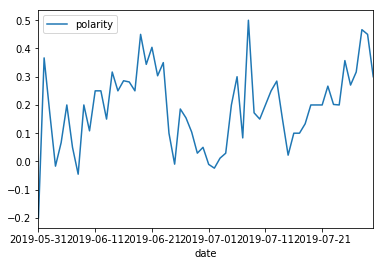

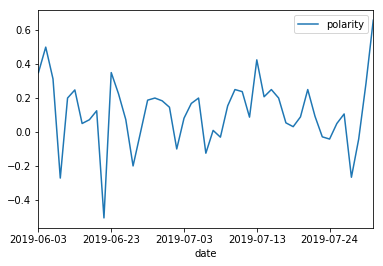

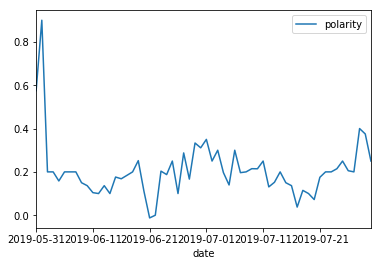

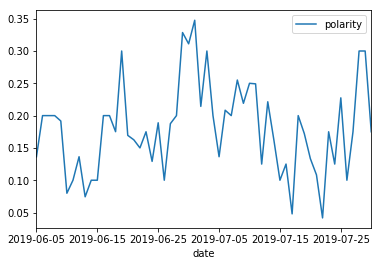

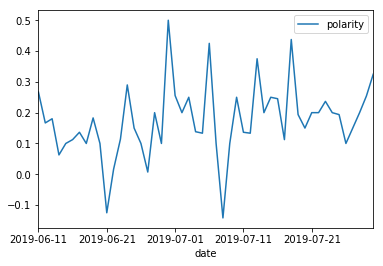

In [0]:
df_amber.groupby(df_amber.date)[['polarity']].median().plot()
df_jordan.groupby(df_jordan.date)[['polarity']].median().plot()
df_tommy.groupby(df_tommy.date)[['polarity']].median().plot()
df_molly.groupby(df_molly.date)[['polarity']].median().plot()
df_maura.groupby(df_maura.date)[['polarity']].median().plot()